## Predict Thyroid Cancer Recurrence Using Various ML Model

In [56]:
# All imports needed for pre-processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [57]:
thyroid_data = pd.read_csv("thyroid_diff.csv")

In [58]:
thyroid_data.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [59]:
thyroid_data.isna().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [60]:
thyroid_data.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [61]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [62]:
thyroid_data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [63]:
thyroid_data.rename( columns={"Age": "age", "Gender": "gender", "Smoking": "smoking", "Hx Smoking":"ex_smoking", 
             "Hx Radiothreapy":"ex_radiothreapy", "Thyroid Function":"Tthyroid_function", "T":"t", "N":"n", "M":"m",
             "Physical Examination":"physical_examination", "Adenopathy":"adenopathy", "Pathology":"pathology", 
            "Focality":"focality", "Rise":"risk", "Stage":"stage", "Response":"response", "Recurred":"recurred"},   
    inplace=True,
)

In [64]:
thyroid_data.head()

,age,gender,smoking,ex_smoking,ex_radiothreapy,Tthyroid_function,physical_examination,adenopathy,pathology,focality,Risk,t,n,m,stage,response,recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


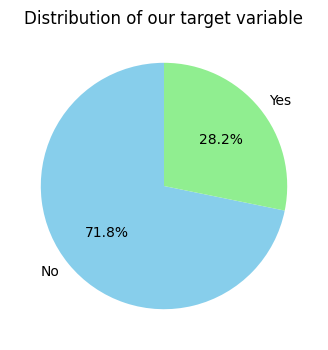

In [65]:
# Group by 'recurred' (target variable) and calculate the average sales for each region
recurred_df = thyroid_data[['recurred','age']]
groupby_count = recurred_df.groupby('recurred').count()
groupby_count = groupby_count.reset_index()
plt.figure(figsize=(4, 4))
plt.pie(groupby_count['age'], labels=groupby_count['recurred'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of our target variable')
plt.show()

In [66]:
# label encoding to gender columns 
label_encoder = LabelEncoder() 

def label_encoding(dataframe, column_name):
    dataframe[column_name] = label_encoder.fit_transform(dataframe[column_name])
    exec(column_name +" = label_encoder.inverse_transform(dataframe[column_name])")


In [67]:
label_encoding(thyroid_data, 'gender')
label_encoding(thyroid_data, 'smoking')
label_encoding(thyroid_data, 'ex_smoking')
label_encoding(thyroid_data, 'ex_radiothreapy')
label_encoding(thyroid_data, 'Tthyroid_function')
label_encoding(thyroid_data, 'physical_examination')
label_encoding(thyroid_data, 'adenopathy')
label_encoding(thyroid_data, 'pathology')
label_encoding(thyroid_data, 'Risk')
label_encoding(thyroid_data, 'stage')
label_encoding(thyroid_data, 'response')
label_encoding(thyroid_data, 'recurred')
label_encoding(thyroid_data, 'focality')

In [68]:
thyroid_data.head()

,age,gender,smoking,ex_smoking,ex_radiothreapy,Tthyroid_function,physical_examination,adenopathy,pathology,focality,Risk,t,n,m,stage,response,recurred
0,27,0,0,0,0,2,3,3,2,1,2,T1a,N0,M0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,T1a,N0,M0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,T1a,N0,M0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,T1a,N0,M0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,T1a,N0,M0,0,1,0


In [69]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   383 non-null    int64 
 1   gender                383 non-null    int32 
 2   smoking               383 non-null    int32 
 3   ex_smoking            383 non-null    int32 
 4   ex_radiothreapy       383 non-null    int32 
 5   Tthyroid_function     383 non-null    int32 
 6   physical_examination  383 non-null    int32 
 7   adenopathy            383 non-null    int32 
 8   pathology             383 non-null    int32 
 9   focality              383 non-null    int32 
 10  Risk                  383 non-null    int32 
 11  t                     383 non-null    object
 12  n                     383 non-null    object
 13  m                     383 non-null    object
 14  stage                 383 non-null    int32 
 15  response              383 non-null    in

In [70]:
# selecting only required or meaningfull feature
thyroid_data = thyroid_data[['age', 'gender', 'smoking', 'ex_smoking', 'ex_radiothreapy',
                            'Tthyroid_function', 'physical_examination', 'adenopathy', 'pathology',
                            'focality', 'Risk', 'stage', 'response', 'recurred']]

In [71]:
thyroid_data.head()

,age,gender,smoking,ex_smoking,ex_radiothreapy,Tthyroid_function,physical_examination,adenopathy,pathology,focality,Risk,stage,response,recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,1,0


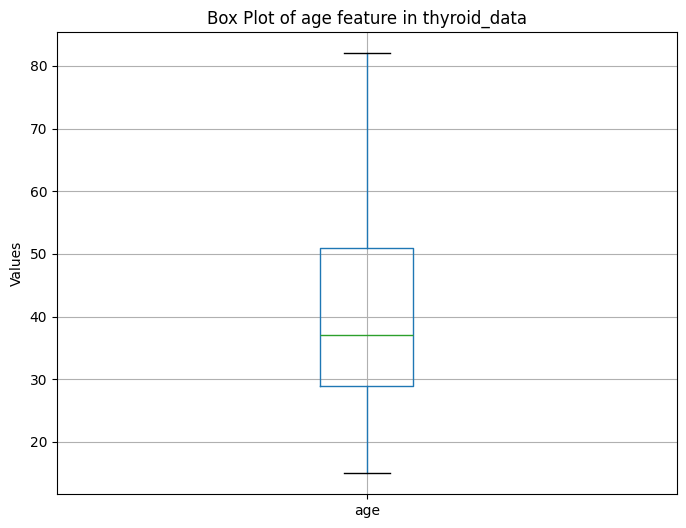

In [72]:
# Box plot for each feature
plt.figure(figsize=(8, 6))
thyroid_data.boxplot(column=['age'])

plt.title('Box Plot of age feature in thyroid_data')
plt.ylabel('Values')

# Show the plot
plt.show()

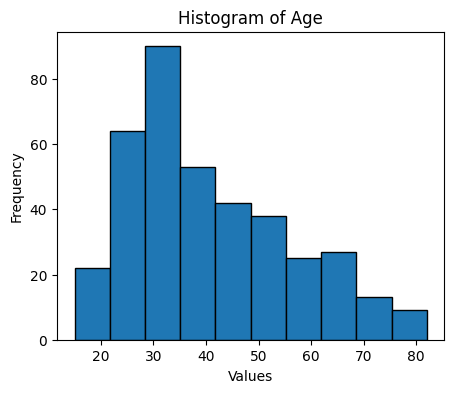

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
thyroid_data['age'].hist(bins=10, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Age')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(visible=False)
plt.show()

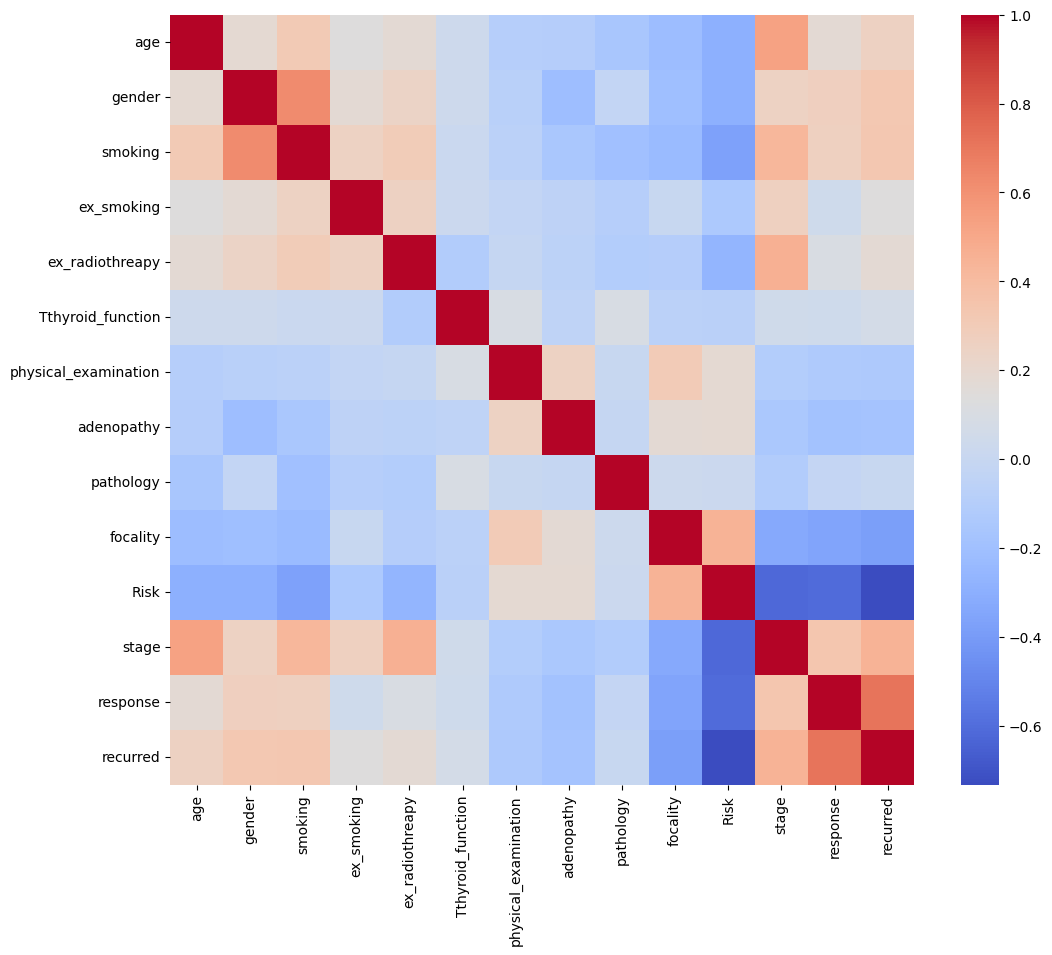

In [74]:
# Correlation Matrix for all the features for feature selection
plt.figure(figsize=(12, 10))
thyroid_data_df = thyroid_data.corr()
ax = sns.heatmap(thyroid_data_df, cmap='coolwarm', fmt = '.2f')

In [75]:
# Machine Learning imports
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

In [78]:
# Feature selection and target selection
features =  thyroid_data[['age', 'gender', 'smoking', 'ex_smoking', 'ex_radiothreapy',
                            'Tthyroid_function', 'physical_examination', 'adenopathy', 'pathology',
                            'focality', 'Risk', 'stage', 'response']]
target = thyroid_data['recurred']

In [79]:
# using the train test split function 
x_train, x_test, y_train, y_test = train_test_split(features, target ,random_state=104,  test_size=0.25,  shuffle=True)

### Decision Tree Classifier

In [80]:
# building decision tree model
model_1_dt = DecisionTreeClassifier(criterion='log_loss', random_state=0)  
model_1_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=0)

In [81]:
y_pred= model_1_dt.predict(x_test)

In [82]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))
print('accurace', accuracy_score(y_test, y_pred))

confusion_matrix
[[68  3]
 [ 3 22]]
accurace 0.9375


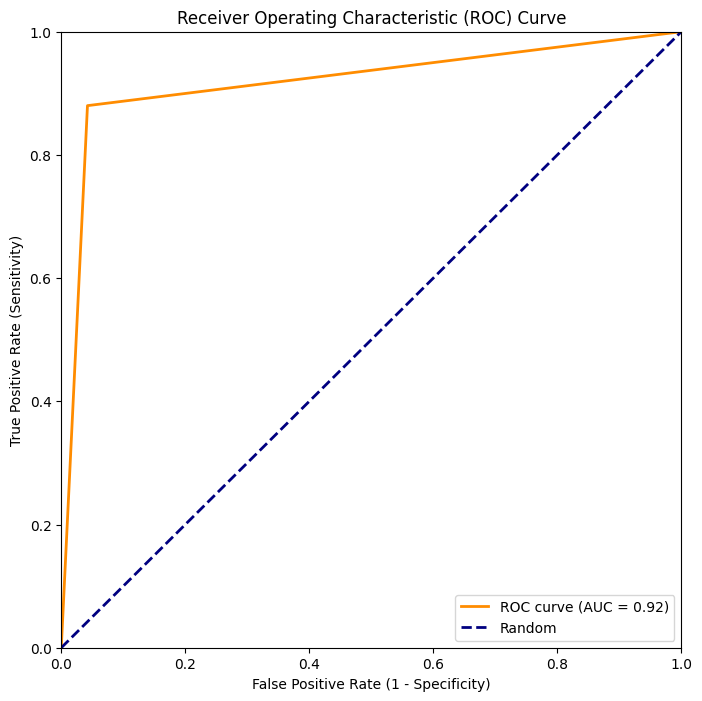

In [83]:
# Computing ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using Matplotlib and Seaborn
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

### Logistic Regression

In [84]:
# Building logistic regression 
model_2_lr = LogisticRegression()
model_2_lr.fit(x_train, y_train)

LogisticRegression()

In [85]:
y_pred = model_2_lr.predict(x_test)

In [86]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))
print('accurace', accuracy_score(y_test, y_pred))

confusion_matrix
[[70  1]
 [ 7 18]]
accurace 0.9166666666666666


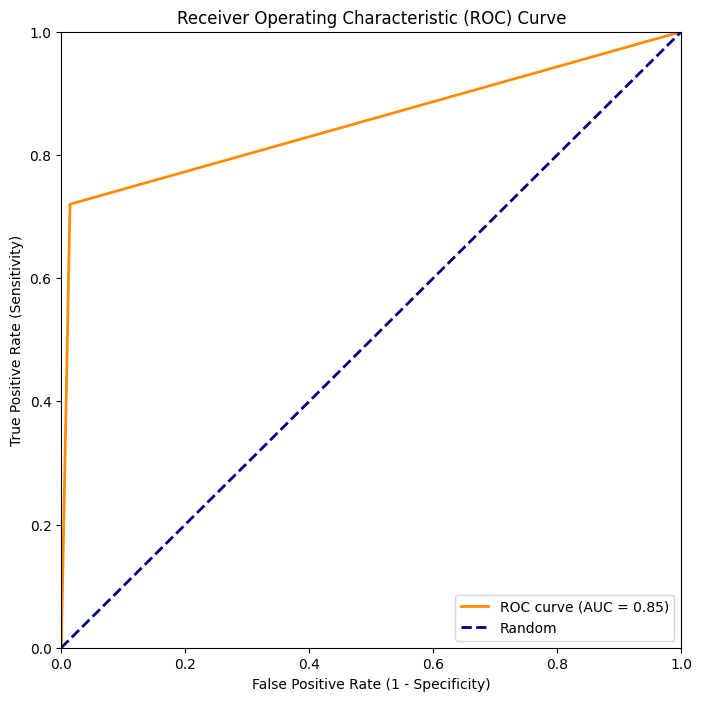

In [87]:

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using Matplotlib and Seaborn
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

### KNN classifier

In [88]:
# building KNN model on thyroid dataset
model_knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [89]:
#Predicting the test set result  
y_pred= model_knn.predict(x_test)  

In [90]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[71  0]
 [13 12]]
0.8645833333333334


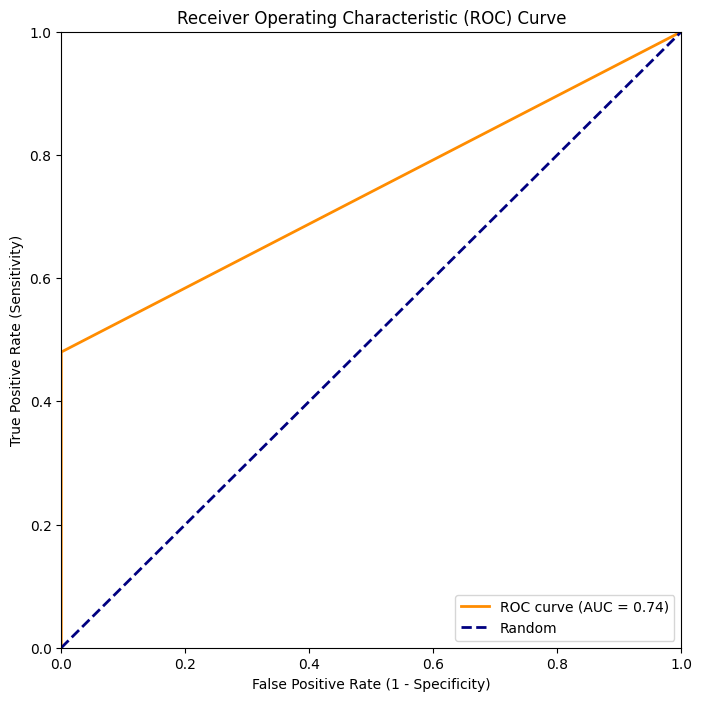

In [91]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using Matplotlib and Seaborn
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

### Support vector machine

In [92]:
# Building Support Vector Machine Model
model_svc = SVC(kernel='linear', random_state=0)  
model_svc.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [93]:
#Predicting the test set result  
y_pred= model_svc.predict(x_test)  

In [94]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))
print('accurace', accuracy_score(y_test, y_pred))

confusion_matrix
[[70  1]
 [ 5 20]]
accurace 0.9375


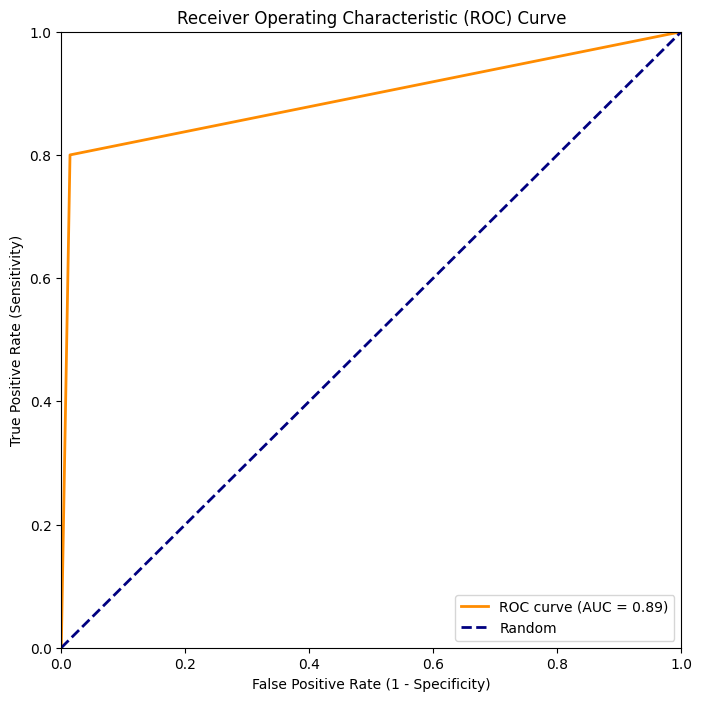

In [95]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using Matplotlib and Seaborn
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

### Naive bayes

In [96]:
# Building Model using Naive Bayes
naive_bayes_model  = GaussianNB()  
naive_bayes_model.fit(x_train, y_train)  

GaussianNB()

In [97]:
# Predicting the Test set results  
y_pred = naive_bayes_model.predict(x_test)  

In [98]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))
print('accurace', accuracy_score(y_test, y_pred))

confusion_matrix
[[63  8]
 [ 2 23]]
accurace 0.8958333333333334


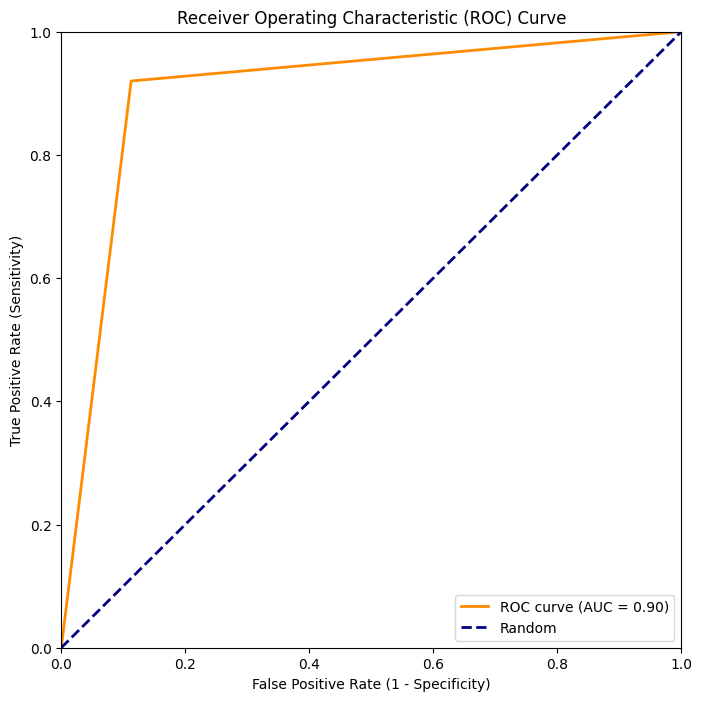

In [99]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using Matplotlib and Seaborn
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

### Random Forest Classifier

In [100]:
# Building Model using Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))
print('accurace', accuracy_score(y_test, y_pred))

confusion_matrix
[[63  8]
 [ 2 23]]
accurace 0.8958333333333334


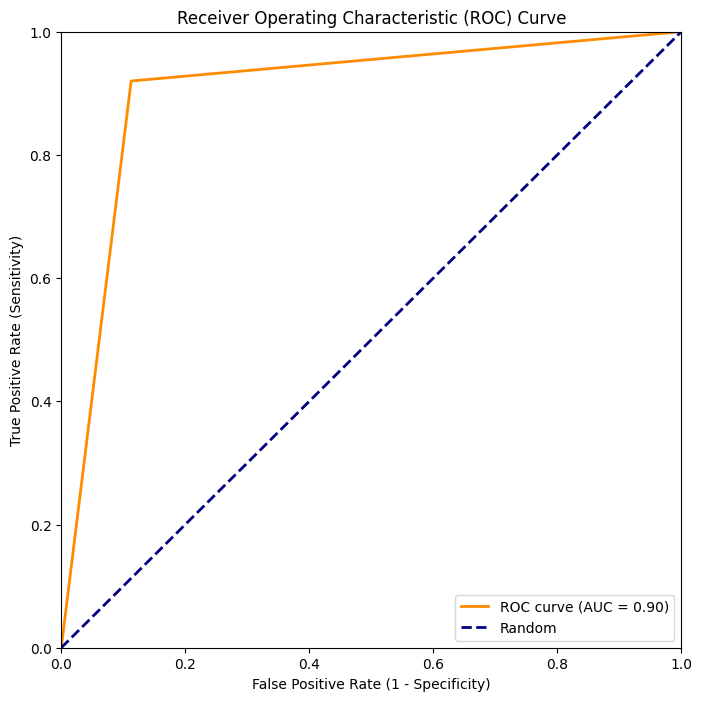

In [102]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using Matplotlib and Seaborn
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()